# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_BRIBrimo_1.csv")
df.head()

,userName,score,at,content
0,Pahmiatol Map,5,2024-05-09 00:11:44,Sangat mudah digunakan
1,Sari Dwi,5,2024-05-09 00:02:34,Ok aplikasinya
2,Ahmad Zaen,5,2024-05-09 00:00:39,Bersama brimo transaksi jual beli jadi nyaman
3,Mamah Mamah,5,2024-05-08 23:57:57,Lumayan membantu
4,AP piri official,5,2024-05-08 23:57:24,"Semua keperluan ada disini di Brimo, memudahka..."


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Sangat mudah digunakan,Pahmiatol Map,2024-05-09 00:11:44
1,Ok aplikasinya,Sari Dwi,2024-05-09 00:02:34
2,Bersama brimo transaksi jual beli jadi nyaman,Ahmad Zaen,2024-05-09 00:00:39
3,Lumayan membantu,Mamah Mamah,2024-05-08 23:57:57
4,"Semua keperluan ada disini di Brimo, memudahka...",AP piri official,2024-05-08 23:57:24
...,...,...,...
194,Aplikasi yang lengkap namun mudah dipahami dal...,Edward Sinaga,2024-05-08 06:12:01
195,Good,Bagas Briyan,2024-05-08 06:07:02
196,"akir akir ini ngebug dan eror, total saldo gag...",Pasukan Anti Prei,2024-05-08 06:05:28
197,Sangat membantu,Waode Nur Amalia Safitri,2024-05-08 06:04:47


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,159,199,198
top,Mantap,Pahmiatol Map,2024-05-08 12:02:15
freq,14,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(159, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,sangat mudah digunakan,Pahmiatol Map,2024-05-09 00:11:44
1,ok aplikasinya,Sari Dwi,2024-05-09 00:02:34
2,bersama brimo transaksi jual beli jadi nyaman,Ahmad Zaen,2024-05-09 00:00:39
3,lumayan membantu,Mamah Mamah,2024-05-08 23:57:57
4,semua keperluan ada disini di brimo memudahkan...,AP piri official,2024-05-08 23:57:24
...,...,...,...
190,ada refresing t,herman afdillah,2024-05-08 06:27:32
191,gangguan trus ampir tiap hari,anna viesta,2024-05-08 06:24:55
194,aplikasi yang lengkap namun mudah dipahami dal...,Edward Sinaga,2024-05-08 06:12:01
196,akir akir ini ngebug dan eror total saldo gag ...,Pasukan Anti Prei,2024-05-08 06:05:28


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,sangat mudah digunakan,Pahmiatol Map,2024-05-09 00:11:44
1,ok aplikasinya,Sari Dwi,2024-05-09 00:02:34
2,bersama brimo transaksi jual beli jadi nyaman,Ahmad Zaen,2024-05-09 00:00:39
3,lumayan membantu,Mamah Mamah,2024-05-08 23:57:57
4,semua keperluan ada disini di brimo memudahkan...,AP piri official,2024-05-08 23:57:24
...,...,...,...
190,ada refresing t,herman afdillah,2024-05-08 06:27:32
191,gangguan trus ampir tiap hari,anna viesta,2024-05-08 06:24:55
194,aplikasi yang lengkap namun mudah dipahami dal...,Edward Sinaga,2024-05-08 06:12:01
196,akir akir ini ngebug dan eror total saldo gag ...,Pasukan Anti Prei,2024-05-08 06:05:28


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,sangat mudah digunakan,Pahmiatol Map,2024-05-09 00:11:44
1,aplikasinya,Sari Dwi,2024-05-09 00:02:34
2,bersama brimo transaksi jual beli jadi nyaman,Ahmad Zaen,2024-05-09 00:00:39
3,lumayan membantu,Mamah Mamah,2024-05-08 23:57:57
4,semua keperluan disini brimo memudahkan dalam ...,AP piri official,2024-05-08 23:57:24
...,...,...,...
190,refresing t,herman afdillah,2024-05-08 06:27:32
191,gangguan trus ampir tiap hari,anna viesta,2024-05-08 06:24:55
194,aplikasi lengkap mudah dipahami penggunaannya ...,Edward Sinaga,2024-05-08 06:12:01
196,akir akir ngebug eror total saldo gag di lihat...,Pasukan Anti Prei,2024-05-08 06:05:28


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                             [sangat, mudah, digunakan]
1                                          [aplikasinya]
2      [bersama, brimo, transaksi, jual, beli, jadi, ...
3                                    [lumayan, membantu]
4      [semua, keperluan, disini, brimo, memudahkan, ...
                             ...                        
190                                       [refresing, t]
191                  [gangguan, trus, ampir, tiap, hari]
194    [aplikasi, lengkap, mudah, dipahami, penggunaa...
196    [akir, akir, ngebug, eror, total, saldo, gag, ...
198                                             [sangat]
Name: content, Length: 159, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BRIBrimo_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BRIBrimo_1.csv', encoding = 'latin1')
df_clean

,content
0,sangat mudah guna
1,aplikasi
2,sama brimo transaksi jual beli jadi nyaman
3,lumayan bantu
4,semua perlu sini brimo mudah dalam transaksi
...,...
154,refresing t
155,ganggu trus ampir tiap hari
156,aplikasi lengkap mudah paham guna lancar terus...
157,akir akir ngebug eror total saldo gag di lihat...


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BRIBrimo_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 10.7MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,sangat mudah guna
1,aplikasi
2,sama brimo transaksi jual beli jadi nyaman
3,lumayan bantu
4,semua perlu sini brimo mudah dalam transaksi
...,...
154,refresing t
155,ganggu trus ampir tiap hari
156,aplikasi lengkap mudah paham guna lancar terus...
157,akir akir ngebug eror total saldo gag di lihat...


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BRIBrimo_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BRIBrimo_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat mudah guna,It's easy to use.
1,1,aplikasi,application
2,2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.
3,3,lumayan bantu,Not bad.
4,4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...
...,...,...,...
154,154,refresing t,refresing t
155,155,ganggu trus ampir tiap hari,Interrupting and driving everyday
156,156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...
157,157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er..."


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BRIBrimo_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat mudah guna,It's easy to use.
1,1,aplikasi,application
2,2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.
3,3,lumayan bantu,Not bad.
4,4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...
...,...,...,...
154,154,refresing t,refresing t
155,155,ganggu trus ampir tiap hari,Interrupting and driving everyday
156,156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...
157,157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er..."


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 89
Netral = 52
Negatif = 18

Total Data Seluruhnya : 159


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sangat mudah guna,It's easy to use.,Positif
1,1,aplikasi,application,Netral
2,2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.,Positif
3,3,lumayan bantu,Not bad.,Positif
4,4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...,Positif
...,...,...,...,...
154,154,refresing t,refresing t,Netral
155,155,ganggu trus ampir tiap hari,Interrupting and driving everyday,Negatif
156,156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...,Positif
157,157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er...",Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sangat mudah guna,It's easy to use.,Positif
1,aplikasi,application,Netral
2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.,Positif
3,lumayan bantu,Not bad.,Positif
4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...,Positif
...,...,...,...
154,refresing t,refresing t,Netral
155,ganggu trus ampir tiap hari,Interrupting and driving everyday,Negatif
156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...,Positif
157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er...",Positif


# **Visualisasi**


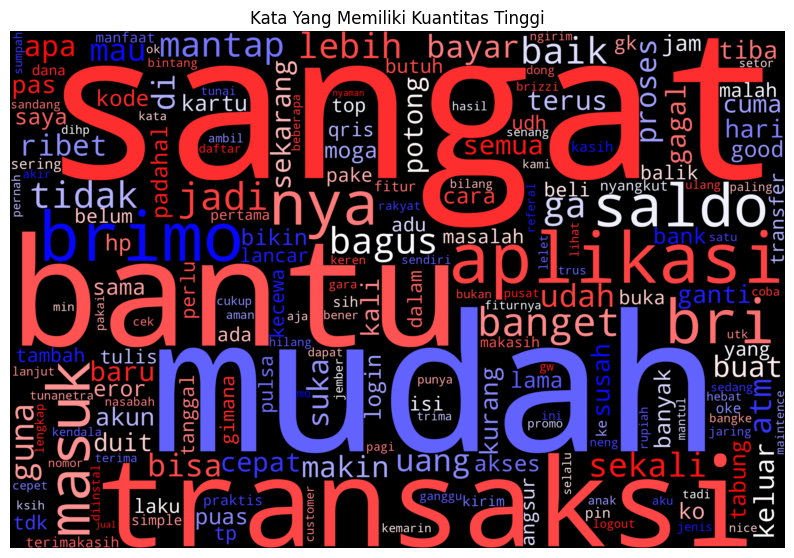

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


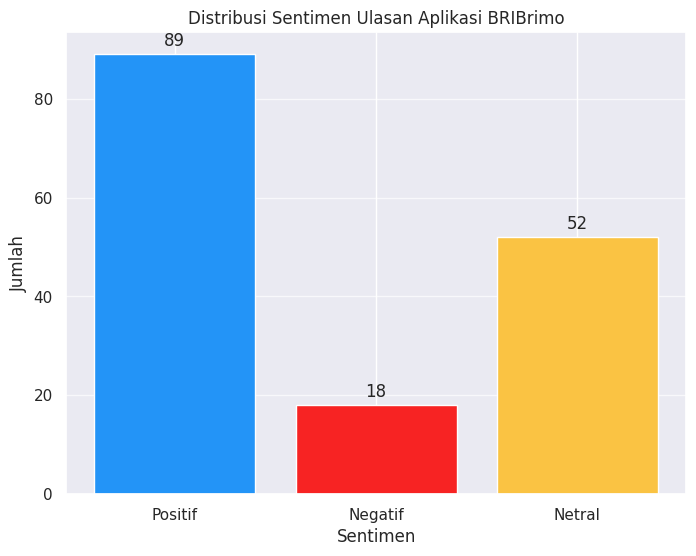

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BRIBrimo")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,sangat mudah guna,It's easy to use.,Positif
2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.,Positif
3,lumayan bantu,Not bad.,Positif
4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...,Positif
5,mantap bantu,Great. Help.,Positif
...,...,...,...
153,tari kasih pecah,Love dance broke.,Positif
155,ganggu trus ampir tiap hari,Interrupting and driving everyday,Negatif
156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...,Positif
157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er...",Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,sangat mudah guna,It's easy to use.,1
2,sama brimo transaksi jual beli jadi nyaman,Same thing Brimo's trade deals get comfortable.,1
3,lumayan bantu,Not bad.,1
4,semua perlu sini brimo mudah dalam transaksi,Everyone needs to be here. Brimo's easy in tra...,1
5,mantap bantu,Great. Help.,1
...,...,...,...
153,tari kasih pecah,Love dance broke.,1
155,ganggu trus ampir tiap hari,Interrupting and driving everyday,0
156,aplikasi lengkap mudah paham guna lancar terus...,The complete application is easy to understand...,1
157,akir akir ngebug eror total saldo gag di lihat...,"Even though the net is smooth, it's a total er...",1


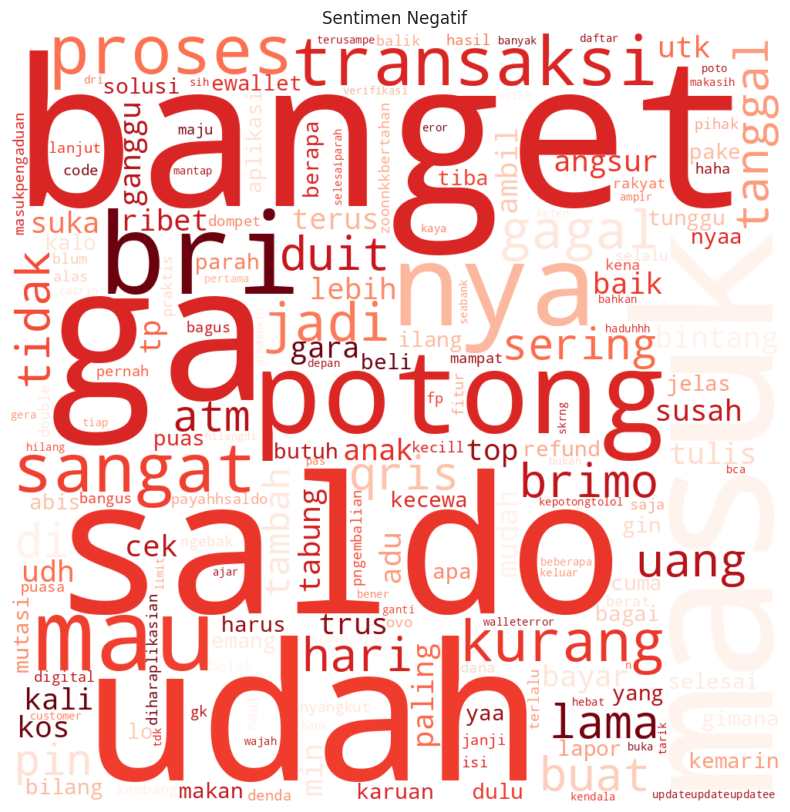

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

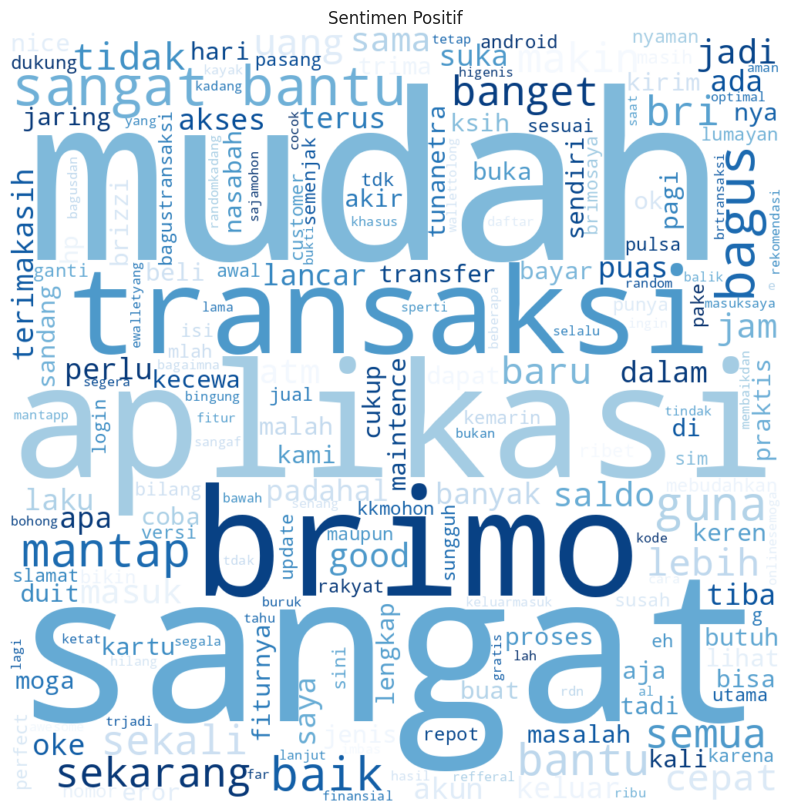

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    89
0    18
Name: count, dtype: int64

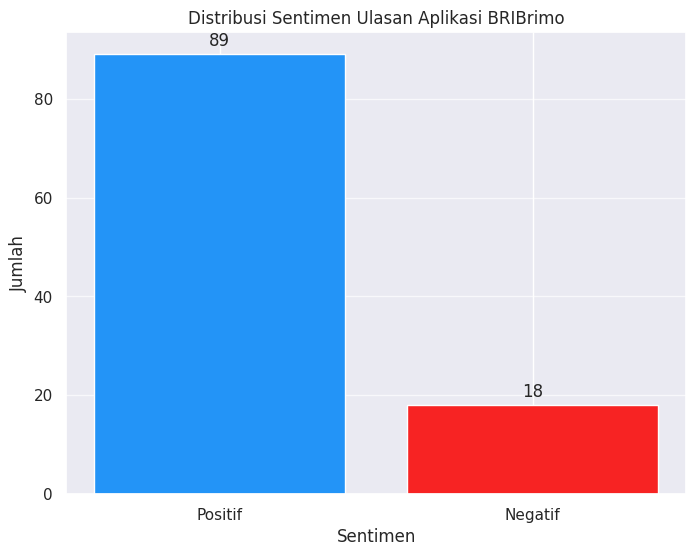

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BRIBrimo")

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

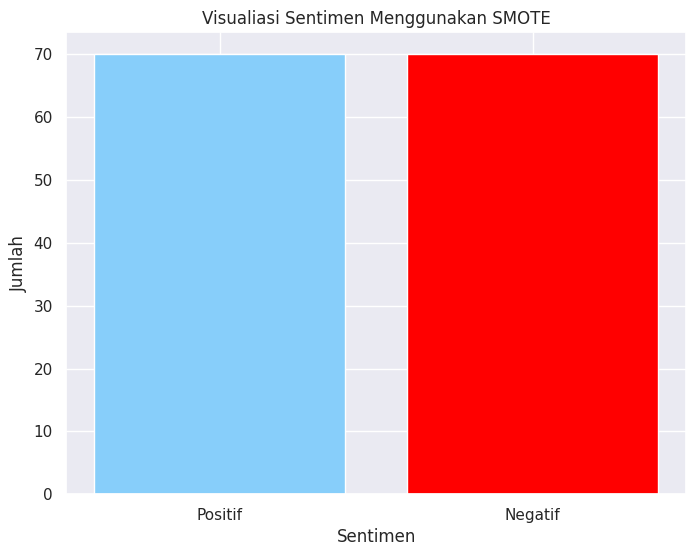

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8636363636363636

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.50      0.33      0.40         3
     Positif       0.90      0.95      0.92        19

    accuracy                           0.86        22
   macro avg       0.70      0.64      0.66        22
weighted avg       0.85      0.86      0.85        22



In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 1  2]
 [ 1 18]]

True Positives (TP) =  1

True Negatives (TN) =  18

False Positives (FP) =  2

False Negatives (FN) =  1

Accuracy =  0.8636363636363636


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

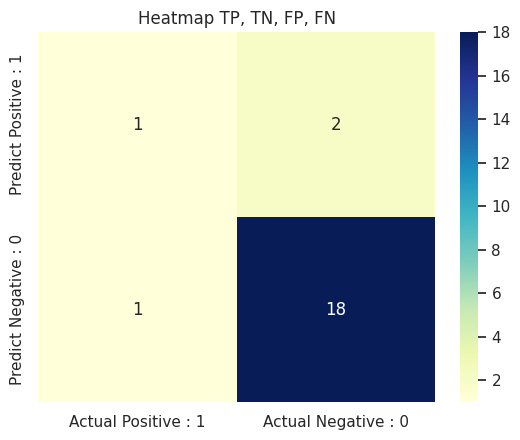

In [52]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [53]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [54]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8636


In [55]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1364


# **Testing**


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus, transaksi aman dan cepat
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [57]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kecewa, saldo berkurang tanpa sebab
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
